# Working with large data set

In this workshop, we will use real data imported from csv file (boston.csv) instead of made-up ones

In [75]:
# import everything we need
import numpy as np
import pandas as pd

In [4]:
''' 
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''

" \nVariables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by town\n B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n LSTAT    % lower status of the population\n MEDV     Median value of owner-occupied homes in $1000's\n "

### Construct a dataframe for our data and target for a better illustration
### set the columns names according to the result above and show the first 5 rows

In [76]:
# Construct a dataframe for our data and target for a better illustration
# set the columns names according to the result above

df = pd.read_csv('boston.csv', index_col=0)

col_map = {
 'CRIM' : 'per capita crime rate by town',
 'ZN' : 'proportion of residential land zoned for lots over 25,000 sq.ft.',
 'INDUS' : 'proportion of non-retail business acres per town',
 'CHAS' : 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 'NOX' : 'nitric oxides concentration (parts per 10 million)',
 'RM' : 'average number of rooms per dwelling',
 'AGE' :'proportion of owner-occupied units built prior to 1940',
 'DIS':'weighted distances to five Boston employment centres',
 'RAD':'index of accessibility to radial highways',
 'TAX' :'full-value property-tax rate per $10,000',
 'PTRATIO':'pupil-teacher ratio by town',
 'B':'1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
 'LSTAT': "% lower status of the population",
 'MEDV' :"Median value of owner-occupied homes in $1000's"}

df = df.rename(columns=col_map)
df.head()

,per capita crime rate by town,"proportion of residential land zoned for lots over 25,000 sq.ft.",proportion of non-retail business acres per town,Charles River dummy variable (= 1 if tract bounds river; 0 otherwise),nitric oxides concentration (parts per 10 million),average number of rooms per dwelling,proportion of owner-occupied units built prior to 1940,weighted distances to five Boston employment centres,index of accessibility to radial highways,"full-value property-tax rate per $10,000",pupil-teacher ratio by town,1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town,% lower status of the population,Median value of owner-occupied homes in $1000's
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Model Training

In [77]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
# notice that we need double square brackets to select X
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
rooms = df[[
            'average number of rooms per dwelling'
            ]]
value = df["Median value of owner-occupied homes in $1000's"]

In [ ]:
# We need 2D arrays for x_train 
print(rooms)

     average number of rooms per dwelling  \
0                                   6.575   
1                                   6.421   
2                                   7.185   
3                                   6.998   
4                                   7.147   
..                                    ...   
501                                 6.593   
502                                 6.120   
503                                 6.976   
504                                 6.794   
505                                 6.030   

     proportion of non-retail business acres per town  
0                                                2.31  
1                                                7.07  
2                                                7.07  
3                                                2.18  
4                                                2.18  
..                                                ...  
501                                             11.93  
502        

In [ ]:
# instantiate a linear regression model
# train the model to fit the training data, finding the coef and intercept

x_train, x_test, y_train, y_test = train_test_split(rooms, value, test_size = 0.2, random_state = 42)


print(x_train.shape)
print(x_test.shape)



(404, 1)
(102, 1)


In [80]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(x_train,y_train)

print(linReg.intercept_)
print(linReg.coef_)




-36.24631889813795
[9.34830141]


# Prediction

Now that we've trained our model, the next step is to predict the data.

Steps:

    Get predictions, 𝑦̂, using LinearRegression.predict()


In [ ]:
print(linReg.predict([[8.0]]))

[38.54009235]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Model Validation

We want to see how well our model fits the data. r2-score should be as close to 1 as possible

In [82]:
# we can see the coefficient and intercept our model finds


from sklearn.metrics import r2_score
y_pred = linReg.predict(x_test)
print('r2_score: ', r2_score(y_test, y_pred))
print('score: ', linReg.score(x_test, y_test))

r2_score:  0.3707569232254778
score:  0.3707569232254778


As the r2-score isn't very close to 1, our linear regression model doesn't really fit the data well
We can visualize it to see what the model looks like

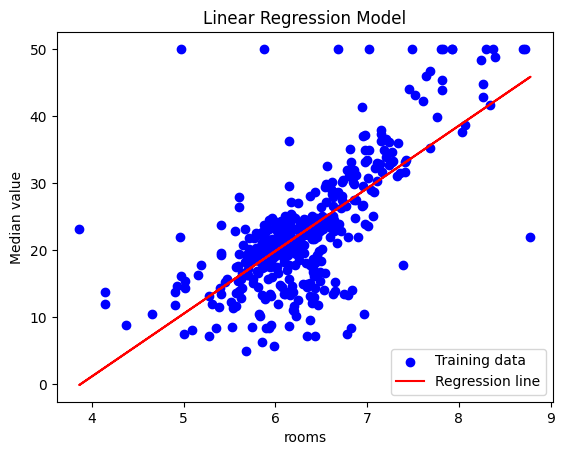

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(x_train, y_train, color='blue', label='Training data')

y_pred_line = linReg.predict(x_train)
plt.plot(x_train, y_pred_line, color='red', label='Regression line')


plt.xlabel('rooms')
plt.ylabel("Median value")
plt.title('Linear Regression Model')
plt.legend()
plt.show()

Plot the regression line (blue) vs the actual value (red)

In [85]:
# We want to plot the regression line(blue) vs the actual value(red)


